In [57]:
library(tidyverse)
library(repr)
source("../scripts/assembly-map.r")
# Change plot size to 4 x 3
options(repr.plot.width=10, repr.plot.height=8)

In [60]:
example_file = "../data/raw_line_reactor/10.0_1000.0_1.0_10.0_.csv"

parse_fname <- function(fname){
    substrings = str_split(fname, "_")[[1]]
    print(substrings)
    return(list(reactors = as.numeric(str_split(substrings[3], "/")[[1]][2]),
                outflow = as.numeric(substrings[5]), 
                forward = as.numeric(substrings[6]) ))
    }

parse_fname(example_file)

[1] "../data/raw"  "line"         "reactor/10.0" "1000.0"       "1.0"         
[6] "10.0"         ".csv"        


$reactors
[1] 10

$outflow
[1] 1

$forward
[1] 10

In [43]:
example_run = read.csv(example_file)

In [44]:
head(example_run)
averages_data = example_run %>% 
    filter(variable %in% c("molecule_count")) %>%
    filter(time < 30)
head(averages_data)

,time,reactor,variable,value
,<dbl>,<int>,<chr>,<dbl>
1,5,5,molecule_count,103.000
2,5,5,var_length,161.873
3,5,5,5,6.000
4,5,5,56,1.000
5,5,5,12,4.000
6,5,5,24,1.000


,time,reactor,variable,value
,<dbl>,<int>,<chr>,<dbl>
1,5.000,5,molecule_count,103
2,29.001,5,molecule_count,120
3,6.000,5,molecule_count,97
4,1.001,5,molecule_count,11
5,13.000,5,molecule_count,109
6,12.000,5,molecule_count,94


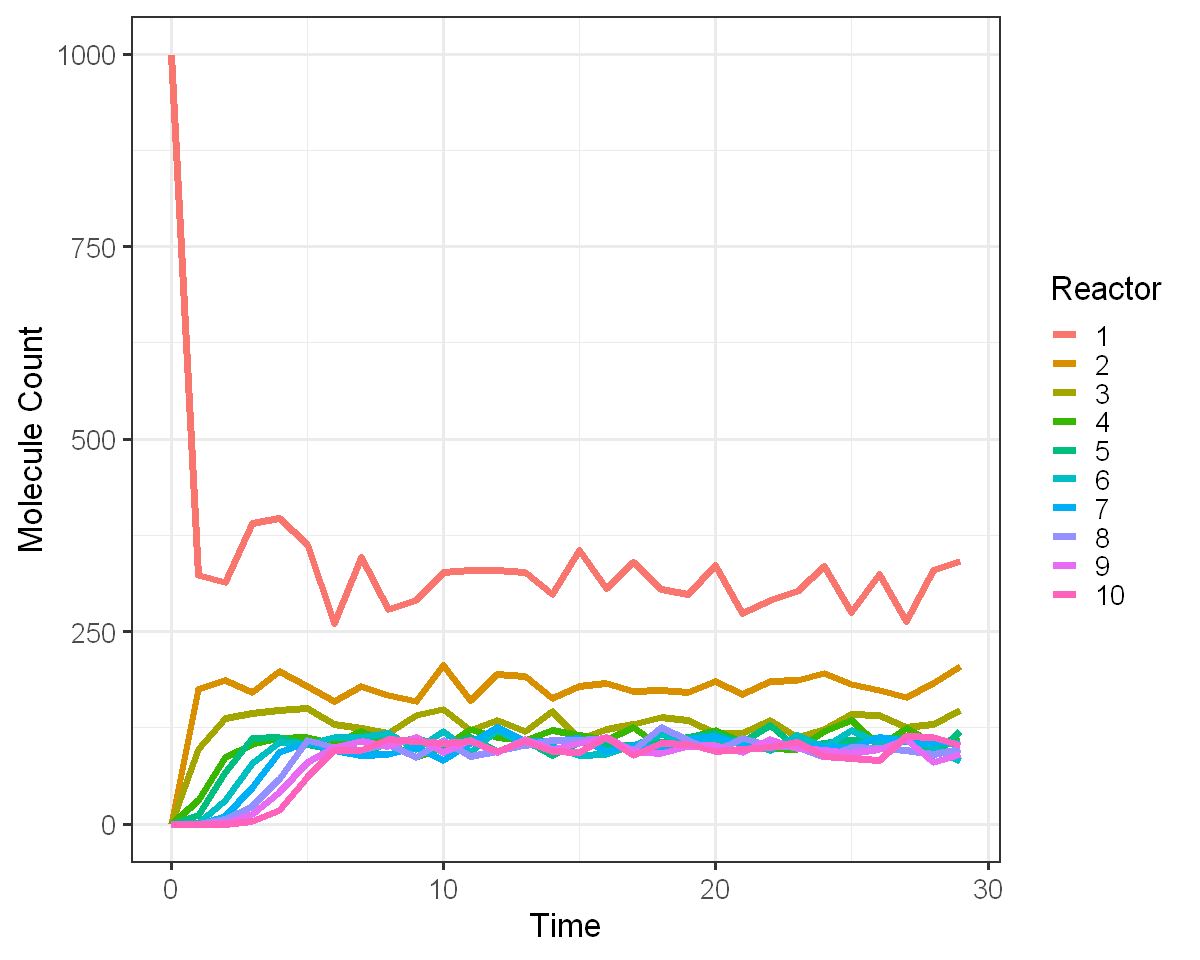

In [50]:
ggplot(averages_data) + 
    geom_line(aes(x = time, y = value, group = reactor, color = as.factor(reactor)), size = 2) +
    theme_bw(base_size = 20) + 
    labs(x = "Time", y = "Molecule Count", color = "Reactor") 

In [6]:
head(example_run)

,time,reactor,variable,value
,<dbl>,<int>,<chr>,<dbl>
1,5,4,molecule_count,328.000000
2,5,4,var_length,8.724099
3,5,4,5,24.000000
4,5,4,16,1.000000
5,5,4,20,2.000000
6,5,4,12,1.000000


In [31]:
complete_timeseries_df <- example_run %>% filter(!variable %in% c("molecule_count", "var_length", "average_length"))  

In [32]:
complete_timeseries_df["AI"] <- assembly_index(as.numeric(complete_timeseries_df$variable))

In [36]:
time_slice <- complete_timeseries_df %>% filter(time == 30.0)

In [37]:
reduced_time <- time_slice %>% group_by(AI, reactor) %>% summarise(total = sum(value))

`summarise()` has grouped output by 'AI'. You can override using the `.groups` argument.



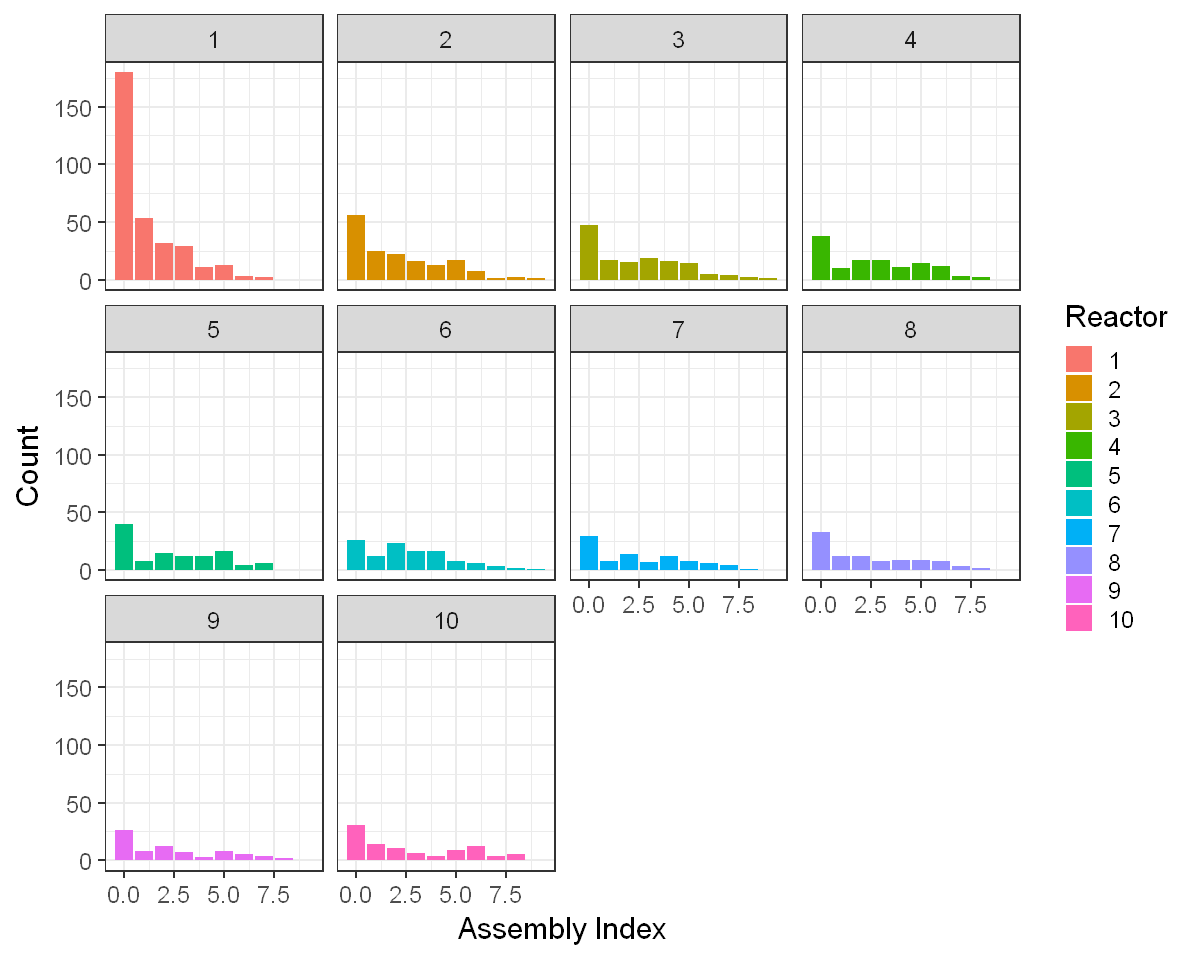

In [56]:
ggplot(reduced_time) + 
    geom_col(aes(x = AI, y = total, fill = as.factor(reactor)), position = "dodge2") + 
    facet_wrap(~reactor) + 
    theme_bw(base_size = 18) +
    labs(x = "Assembly Index", y = "Count", fill = "Reactor")